Considering the notebook workshop #3 and #4 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import tqdm as tqdm

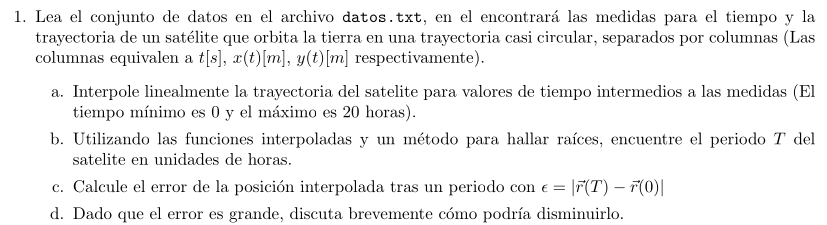

In [2]:
# Obtaining data
df = pd.read_csv("data.txt", delimiter= " ")

time_df = df.iloc[:, 0]
x_df = df.iloc[:, 1]
y_df = df.iloc[:,2] 

a. Linearly interpolate the satellite's track for time values ​​intermediate the measurements (minimum time is 0 and maximum is 20 hours).

In [3]:
# Linear Interpolation function
# ME
# x_int: value for interpolate 
# xn, yn: data sets
def linear_interpolation(x_int, xn, yn):
    N = len(xn)
    for i in range(N-1):
        if x_int >= xn[i] and x_int<=xn[i+1]:
            x = x_int
            y_int = ((yn[i+1]-yn[i])/(xn[i+1]-xn[i]))*(x-xn[i]) + yn[i]
            break
    return y_int

### BAD, I can't interpolate between P2, P3 or another points

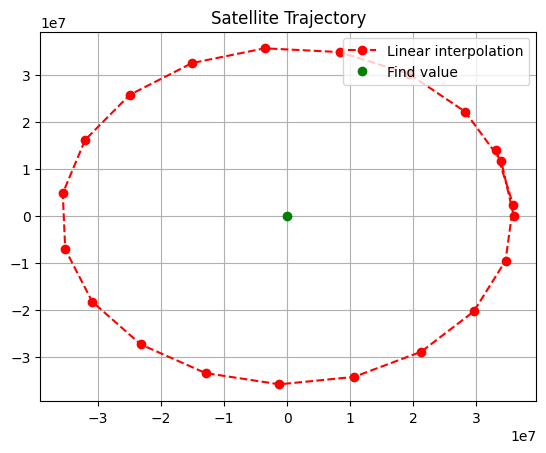

In [12]:
# Interpolation process
xn = x_df # data frame values
yn = y_df # data frame values

x_sol = []
y_sol = []
for i in range(1,len(time_df)):
    #x_sol.append(time_df[i])
    y_sol.append(linear_interpolation(1.5,xn,yn))

#print(x_sol)
plt.plot(xn, yn, 'o--', color="red", label="Linear interpolation")
plt.title("Satellite Trajectory")
plt.plot(1.5,0,'o', color='green', label='Find value')
#plt.plot(time_df[i], y_sol[10],'o', color='blue', label='Find value')
#plt.plot(0, 0,'o', color='green', label='Find value')
plt.grid()
plt.legend()

b. Using the interpolated functions and a method for finding square roots, find the satellite's period T in units of hours.

Third Kepler's law:
    $$T^{2} = \frac{4\pi^{2}}{GM}a^{3}$$
where for this case

    G: Earth gravity
    M: Earth mass
    a: semi-major axis of the orbit

the fist objective is to find a.
we can find the two square root of the ellipse and calculate their distance.

In [5]:
# Construction of f
def f(x,x_sol = x_sol, y_sol=y_sol):
    if x not in x_sol:
        print("The value is'n valid")
        return
    else:
        i = x_sol.index(x)
        return y_sol[i]

In [6]:
# Method for finding square roots
def bisection(a,b,f, eps):
    if (f(a)*f(b) > 0.0):
        print("select a better interval")
        return

    pbar = tqdm(desc="Calculating root", unit=" iter")
    while True:
        p = (a+b)/2
        print(f(p))
        # The root is in the interval (p,b)
        if f(a)*f(p) > 0: a = p

        # The root is in the interval (a,p)
        if f(a)*f(p) < 0: b = p

        if np.abs(f(p)) < eps: break
        pbar.update(1)
    pbar.close


In [7]:
a = x_sol[17]
b = x_sol[19]
bisection(a,b,f, 1.0e-10)

select a better interval


Solution find by f( 72000.0 ) is: -35703506.5262617


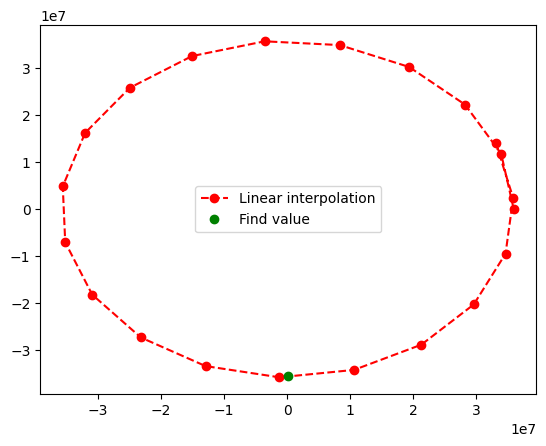

In [8]:
xn = x_df  
yn = y_df 

# For someone value of time I obtain the same result
for i in range(len(time_df)):
    x_sol = time_df[i]
    y_sol = linear_interpolation(x_sol,xn,yn)

print('Solution find by f(',x_sol,') is:',y_sol)
plt.plot(xn,yn,'o--',color='red',label='Linear interpolation')
plt.plot(x_sol,y_sol,'o',color='green',label='Find value',)
plt.legend()